In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print("URL:", s)


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [3]:
df = pd.read_csv(s, header=None, encoding='utf-8')
df


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',0,1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
X=df.iloc[0:100,[0,2]].values

In [7]:
class AdalineGD:
    def __init__(self, lr=0.01, n_iter=50, random_state=42):
        self.lr = lr
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc= 0.0, scale=0.01, size=X.shape[1])
        self.b_=np.float64(0.0)
        self.losses_=[]

        for i in range(self.n_iter):
            net_input=self.net_input(X)
            output=self.activation(net_input)
            errors=(y-output)
            self.w_+=self.lr*np.float64(2.0)*X.T.dot(errors)/X.shape[0]
            self.b_+=self.lr*np.float64(2.0)*errors.mean()
            loss=(errors**2).mean()
            self.losses_.append(loss)
        return self        

    def net_input(self,X):
        return np.dot(X,self.w_)+self.b_

    def activation(self,X):
        return X

    def predict(self,X):
        return np.where(self.activation(self.net_input(X))>=0.5,1,0)
  

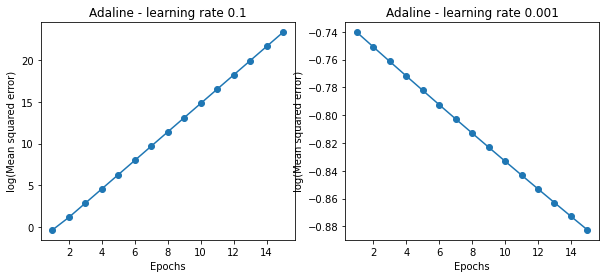

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=15, lr=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_)+1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - learning rate 0.1')
ada2=AdalineGD(n_iter=15, lr=0.0001).fit(X, y)
ax[1].plot(range(1,len(ada2.losses_)+1),np.log(ada2.losses_),marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Mean squared error)')
ax[1].set_title('Adaline - learning rate 0.001')
plt.show()


In [9]:
X_std=np.copy(X)
X_std[:,0]=(X[:,0]-X[:,0].mean())/X[:,0].std()
X_std[:,1]=(X[:,1]-X[:,1].mean())/X[:,1].std()

In [10]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    print(xx1)
    print(xx2)
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=1, c=colors[idx],
                    marker=markers[idx], label=f'Class {cl}', edgecolor='black')


[[-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 ...
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]
 [-2.8340382 -2.8140382 -2.7940382 ...  3.3459618  3.3659618  3.3859618]]
[[-2.29188606 -2.29188606 -2.29188606 ... -2.29188606 -2.29188606
  -2.29188606]
 [-2.27188606 -2.27188606 -2.27188606 ... -2.27188606 -2.27188606
  -2.27188606]
 [-2.25188606 -2.25188606 -2.25188606 ... -2.25188606 -2.25188606
  -2.25188606]
 ...
 [ 2.50811394  2.50811394  2.50811394 ...  2.50811394  2.50811394
   2.50811394]
 [ 2.52811394  2.52811394  2.52811394 ...  2.52811394  2.52811394
   2.52811394]
 [ 2.54811394  2.54811394  2.54811394 ...  2.54811394  2.54811394
   2.54811394]]


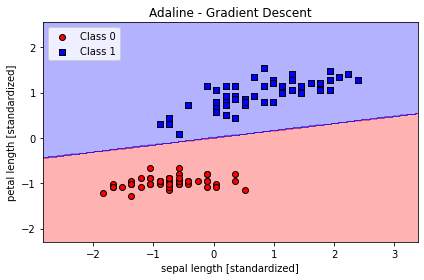

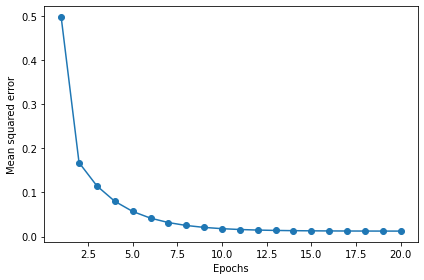

In [13]:
ada_gd=AdalineGD(n_iter=20,lr=0.5)
ada_gd.fit(X_std,y)
plot_decision_regions(X_std,y,classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1,len(ada_gd.losses_)+1),ada_gd.losses_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()
plt.show()